阶数 $n = 3$ 时
$$A = \begin{pmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33}
\end{pmatrix}, \quad b = \begin{pmatrix}
b_{1} \\
b_{2} \\
b_{3}
\end{pmatrix},$$
Jacobi第 $k$ 次迭代，
$$x_{1}^{(k+1)} = \frac{b_{1} - a_{12}x_{2}^{(k)} - a_{13}x_{3}^{(k)}}{a_{11}}$$
$$
x_{2}^{(k+1)} = \frac{b_{2} - a_{21}x_{1}^{(k)} - a_{23}x_{3}^{(k)}}{a_{22}}$$
$$x_{3}^{(k+1)} = \frac{b_{3} - a_{31}x_{1}^{(k)} - a_{32}x_{2}^{(k)}}{a_{33}}$$
由公式可以看出, 每一次迭代的各个分量都是独立计算的, 这也是为什么 Jacobi 迭代可以用于并行计算。
或等价的, 将 $A$ 分解为 $A = D - L - U$, 其中 $D$,
$$
D = \text{diag}(a_{11}, a_{22}, a_{33}),$$
$L$,
$$L = -\begin{bmatrix}
0 & 0 & 0 \\
a_{21} & 0 & 0 \\
a_{31} & a_{32} & 0
\end{bmatrix}, \quad U = -\begin{bmatrix}
0 & a_{12} & a_{13} \\
0 & 0 & a_{23} \\
0 & 0 & 0
\end{bmatrix}.$$
由此可以推导出
$$(D - L - U)x = b$$
$$
Dx = b + (L + U)x$$
$$x = D^{-1}(b + (L + U)x)$$

写成矩阵的形式
$$\begin{bmatrix}
x_{1}^{(k+1)} \\
x_{2}^{(k+1)} \\
x_{3}^{(k+1)}
\end{bmatrix}
=
\begin{bmatrix}
\frac{1}{a_{11}} & \frac{1}{a_{22}} & \frac{1}{a_{33}}
\end{bmatrix}
\left(
\begin{bmatrix}
b_{1} \\
b_{2} \\
b_{3}
\end{bmatrix}
-
\begin{bmatrix}
a_{21} & a_{12} & a_{13} \\
a_{31} & a_{32} & a_{23}
\end{bmatrix}
\begin{bmatrix}
x_{1}^{(k)} \\
x_{2}^{(k)} \\
x_{3}^{(k)}
\end{bmatrix}
\right)$$
于是我们得到
Jacobi迭代法的主要思路：在特定的迭代步长和容许误差内

输入: A, b, $x^(0)$，输出 $x^{n}$
$$x^{(0)} = \text{initial vector}$$
$$
x^{(k+1)} = D^{-1}(b + (L + U)x^{(k)})$$

实现步骤
- 步骤 1: $k = 0, x = x^(0)$;
- 步骤 2: 计算残差 $r = ||b - Ax||$
- 如果残差 $r > e_{tol}$ 且 k < N, 转到步骤 3; 否则, 转到步骤 5;
- 步骤 3: 更新解向量
$$x = D^{-1}(b + (L + U)x^{(0)})$$
- 步骤 4: $x0 = x, k = k + 1$, 转步骤 2;
- 步骤 5: 输出 x.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def jacobi(A, b, x0, e_tol, N):
    """
    Jacobi 迭代法解线性方程组 Ax = b

    参数:
    A : 系数矩阵
    b : 常数向量
    x0 : 初始解
    e_tol : 误差容限
    N : 最大迭代次数

    返回:
    x : 数值解的每次迭代结果
    k : 实际迭代次数
    r : 最终残差
    """
    n = len(b)
    x = np.zeros((n, N))  # 存储每次迭代的结果
    x[:, 0] = x0  # 初始值
    D = np.diag(np.diag(A))  # 对角矩阵 D
    L = -np.tril(A, -1)  # 下三角部分 L
    U = -np.triu(A, 1)  # 上三角部分 U

    r = np.linalg.norm(b - np.dot(A, x[:, 0]), 2)  # 初始残差
    k = 0

    while r > e_tol and k < N:
        x[:, k + 1] = np.dot(np.linalg.inv(D), b + np.dot(L + U, x[:, k]))
        r = np.linalg.norm(b - np.dot(A, x[:, k + 1]), 2)  # 更新残差
        k += 1

    x = x[:, :k + 1]  # 返回实际迭代结果
    if k >= N:
        print(f"Jacobi 迭代未收敛，达到最大迭代次数 {N} 次。")
    else:
        print(f"Jacobi 迭代收敛，共进行了 {k} 次迭代。")

    return x, k, r

Gauss-Seidel迭代法

$$A = \begin{pmatrix}
a_{11} & a_{12} & a_{13} \\
a_{21} & a_{22} & a_{23} \\
a_{31} & a_{32} & a_{33}
\end{pmatrix}, \quad b = \begin{pmatrix}
b_1 \\
b_2 \\
b_3
\end{pmatrix},$$

由Jacobi公式可以看出Jacobi方法每次迭代使用的是上一步的结果，每行全部独立计算完后才进入下一轮迭代。

而实际上计算$x_2$时，本次迭代产生的$x_1$已经更新，使用$x_3$时，$x_1$，$x_2$已经更新，于是引出了Gauss-Seidel方法。

Gauss-Seidel公式为
\begin{aligned}
 & x_{1}^{(k+1)}=\frac{b_1-a_{12}x_2^{(k)}-a_{13}x_3^{(k)}}{a_{11}} \\
 & x_2^{(k+1)}=\frac{b_2-a_{21}x_1^{(k+1)}-a_{23}x_3^{(k)}}{a_{22}} \\
 & x_3^{(k+1)}=\frac{b_3-a_{31}x_1^{(k+1)}-a_{32}x_2^{(k+1)}}{a_{33}}
\end{aligned}
或等价的,将 A分解为 $A=D-L-U$, 其中
\begin{aligned}
 & D = \begin{bmatrix}
a_{11} & & 0 & & 0 \\
0 & & a_{22} & & 0 \\
0 & & 0 & & a_{33}
\end{bmatrix},\quad 
 & L=-
\begin{bmatrix}
0 & & 0 & & 0 \\
a_{21} & & 0 & & 0 \\
a_{31} & & a_{32} & & 0
\end{bmatrix},\quad U=-
\begin{bmatrix}
0 & & a_{12} & & a_{13} \\
0 & & 0 & & a_{23} \\
0 & & 0 & & 0
\end{bmatrix}. 
\end{aligned}
于是有
\begin{aligned}
 & & (D-L-U)x=\mathrm{b} \\
 & & Dx=b+(L+U)x \\
 & & Dx^{(k+1)}=b+Lx^{(k+1)}+Ux^{(k)} \\
 & & (D-L)x^{(k+1)}=b+Ux^{(k)} \\
 & & x^{(k+1)}=(D-L)^{-1}(b+Ux^{(k)})
\end{aligned}
 其中$x^{(k+1)}=D^{-1}(b+Lx^{(k+1)}+Ux^{(k)})$

实现步骤与 Jacobi 迭代类似

In [2]:
def gauss_seidel(A, b, x0, e_tol, N):
    """
    Gauss-Seidel 迭代法解线性方程组 Ax = b

    参数:
    A : 系数矩阵
    b : 常数向量
    x0 : 初始解
    e_tol : 误差容限
    N : 最大迭代次数

    返回:
    x : 数值解的每次迭代结果
    k : 实际迭代次数
    r : 最终残差
    """
    n = len(b)
    x = np.zeros((n, N))  # 存储每次迭代的结果
    x[:, 0] = x0  # 初始值
    r = np.linalg.norm(b - np.dot(A, x[:, 0]), 2)  # 初始残差
    k = 0

    while r > e_tol and k < N:
        for i in range(n):
            sum1 = np.dot(A[i, :i], x[:i, k + 1])  # 更新值
            sum2 = np.dot(A[i, i + 1:], x[i + 1:, k])  # 使用旧值
            x[i, k + 1] = (b[i] - sum1 - sum2) / A[i, i]
        r = np.linalg.norm(b - np.dot(A, x[:, k + 1]), 2)  # 更新残差
        k += 1

    x = x[:, :k + 1]  # 返回实际迭代结果
    if k >= N:
        print(f"Gauss-Seidel 迭代未收敛，达到最大迭代次数 {N} 次。")
    else:
        print(f"Gauss-Seidel 迭代收敛，共进行了 {k} 次迭代。")

    return x, k, r

举例比较两种算法

Jacobi 迭代收敛，共进行了 26 次迭代。
Gauss-Seidel 迭代收敛，共进行了 10 次迭代。


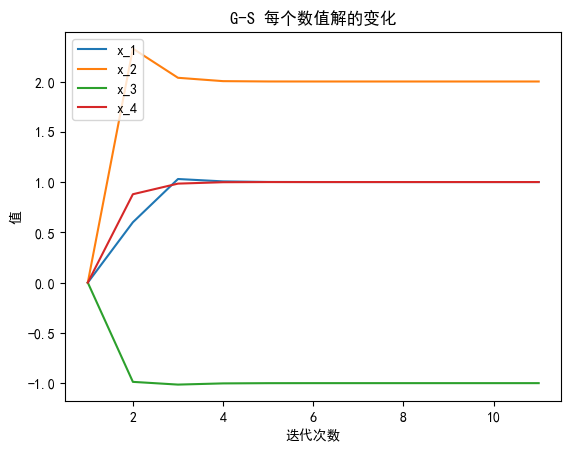

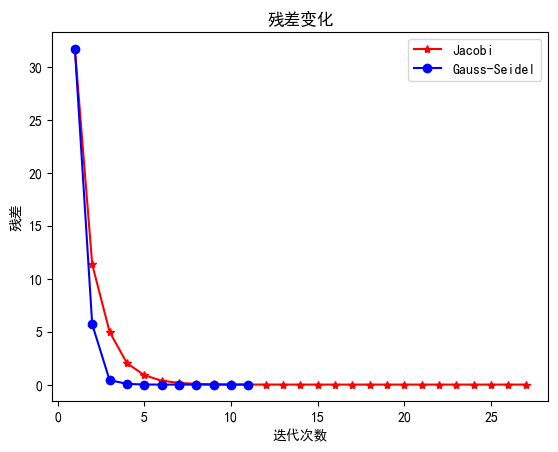

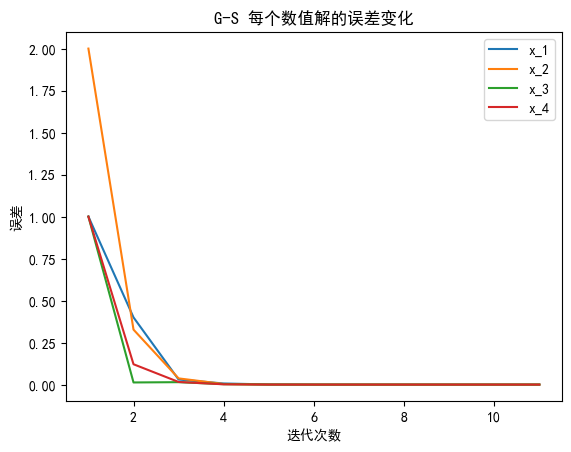

In [15]:
#比较 Jacobi 和 Gauss-Seidel 方法
N = 100
e_tol = 1e-8
A = np.array([[10, -1, 2, 0],
              [-1, 11, -1, 3],
              [2, -1, 10, -1],
              [0, 3, -1, 8]])
b = np.array([6, 25, -11, 15])
x0 = np.zeros(4)

# 运行 Jacobi 和 Gauss-Seidel 方法
x_jacobi, k_jacobi, r_jacobi = jacobi(A, b, x0, e_tol, N)
x_gs, k_gs, r_gs = gauss_seidel(A, b, x0, e_tol, N)

# 精确解
x_exact = np.array([1, 2, -1, 1])

# 计算误差和残差
error_jacobi = np.abs(x_exact[:, None] - x_jacobi)
error_gs = np.abs(x_exact[:, None] - x_gs)

residual_jacobi = [np.linalg.norm(b - np.dot(A, x_jacobi[:, i]), 2) for i in range(k_jacobi + 1)]
residual_gs = [np.linalg.norm(b - np.dot(A, x_gs[:, i]), 2) for i in range(k_gs + 1)]

# 绘图
# Set font to SimHei (or any other Chinese-supporting font installed on your system)
from matplotlib import rcParams
rcParams['font.sans-serif'] = ['SimHei']  # Use SimHei for Chinese
rcParams['axes.unicode_minus'] = False    # Ensure minus signs are rendered correctly
# 数值解变化（Gauss-Seidel）
plt.figure(1)
for i in range(4):
    plt.plot(range(1, k_gs + 2), x_gs[i, :], label=f"x_{i + 1}")
plt.legend()
plt.title("G-S 每个数值解的变化")
plt.xlabel("迭代次数")
plt.ylabel("值")

# 残差变化
plt.figure(2)
plt.plot(range(1, k_jacobi + 2), residual_jacobi, '-*r', label="Jacobi")
plt.plot(range(1, k_gs + 2), residual_gs, '-ob', label="Gauss-Seidel")
plt.legend()
plt.title(r"残差变化")
plt.xlabel("迭代次数")
plt.ylabel("残差")

# 误差变化（Gauss-Seidel）
plt.figure(3)
for i in range(4):
    plt.plot(range(1, k_gs + 2), error_gs[i, :], label=f"x_{i + 1}")
plt.legend()
plt.title(r"G-S 每个数值解的误差变化")
plt.xlabel("迭代次数")
plt.ylabel("误差")

plt.show()